**Importing dependencies**

In [ ]:
# Name: Muhammad Junaid Iftikhar
# Roll Number: Ezi-ML-B1-161
# TASK 09 CIFAR10 CNN

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize


**Train test split**

In [3]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer",
               "Dog", "Frog", "Horse", "Ship", "Truck"]

print("Train:", x_train.shape, y_train.shape)
print("Test :", x_test.shape, y_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
Train: (50000, 32, 32, 3) (50000,)
Test : (10000, 32, 32, 3) (10000,)


**Data Augmentation**

In [4]:

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)


**Baseline CNN Model**

In [5]:

def build_cnn_multiclass(input_shape=(32,32,3), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

multiclass_model = build_cnn_multiclass()
multiclass_model.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])
multiclass_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

**Train Baseline CNN**

In [6]:

history_multiclass = multiclass_model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    steps_per_epoch=len(x_train)//64,
    epochs=20,
    validation_data=(x_test, y_test)
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 82s 103ms/step - accuracy: 0.2658 - loss: 1.9690 - val_accuracy: 0.5082 - val_loss: 1.3631
Epoch 2/20
  1/781 ━━━━━━━━━━━━━━━━━━━━ 58s 74ms/step - accuracy: 0.3750 - loss: 1.5392

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3750 - loss: 1.5392 - val_accuracy: 0.5014 - val_loss: 1.3638
Epoch 3/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 78s 100ms/step - accuracy: 0.4626 - loss: 1.4825 - val_accuracy: 0.5852 - val_loss: 1.1738
Epoch 4/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5312 - loss: 1.1868 - val_accuracy: 0.5817 - val_loss: 1.1767
Epoch 5/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 138s 101ms/step - accuracy: 0.5243 - loss: 1.3231 - val_accuracy: 0.6318 - val_loss: 1.0350
Epoch 6/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5469 - loss: 1.2949 - val_accuracy: 0.6301 - val_loss: 1.0425
Epoch 7/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 137s 101ms/step - accuracy: 0.5725 - loss: 1.2094 - val_accuracy: 0.6482 - val_loss: 0.9906
Epoch 8/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5156 - loss: 1.2131 - val_accuracy: 0.6532 - val_loss: 0.9778
Epoch 9/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 79s 101ms/step - accuracy: 0.6035 - loss: 1.1335 - val_accuracy:

**AlexNet-Style Model**

In [7]:

def build_alexnet_multiclass(input_shape=(32,32,3), num_classes=10):
    inputs = layers.Input(shape=input_shape)

    x = layers.Conv2D(96, (3,3), activation='relu', padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2,2))(x)

    x = layers.Conv2D(256, (3,3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2,2))(x)

    x = layers.Conv2D(384, (3,3), activation='relu', padding='same')(x)
    x = layers.Conv2D(384, (3,3), activation='relu', padding='same')(x)
    x = layers.Conv2D(256, (3,3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2,2))(x)

    x = layers.Flatten()(x)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(num_classes, activation='softmax')(x)

    return models.Model(inputs=inputs, outputs=outputs)

alexnet_multiclass = build_alexnet_multiclass()
alexnet_multiclass.compile(optimizer=optimizers.Adam(1e-4),
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])
alexnet_multiclass.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 96)     │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       221,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,048,394 (30.70 MB)

 Trainable params: 8,047,690 (30.70 MB)

 Non-trainable params: 704 (2.75 KB)

**Train AlexNet**

In [8]:

history_alexnet_multi = alexnet_multiclass.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    steps_per_epoch=len(x_train)//64,
    epochs=20,
    validation_data=(x_test, y_test)
)


Epoch 1/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 1357s 2s/step - accuracy: 0.3124 - loss: 1.8728 - val_accuracy: 0.5490 - val_loss: 1.2448
Epoch 2/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 83s 105ms/step - accuracy: 0.5156 - loss: 1.4264 - val_accuracy: 0.5562 - val_loss: 1.2253
Epoch 3/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 1354s 2s/step - accuracy: 0.5301 - loss: 1.3070 - val_accuracy: 0.6057 - val_loss: 1.1202
Epoch 4/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 83s 105ms/step - accuracy: 0.5000 - loss: 1.3112 - val_accuracy: 0.6106 - val_loss: 1.1110
Epoch 5/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 1347s 2s/step - accuracy: 0.6189 - loss: 1.0833 - val_accuracy: 0.6728 - val_loss: 0.9461
Epoch 6/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 84s 105ms/step - accuracy: 0.6719 - loss: 0.8505 - val_accuracy: 0.6733 - val_loss: 0.9363
Epoch 7/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 1338s 2s/step - accuracy: 0.6718 - loss: 0.9397 - val_accuracy: 0.6736 - val_loss: 0.9445
Epoch 8/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 64s 79ms/step - accuracy: 0.6406 - loss: 0.9050

**Evaluate & Compare**

In [9]:

test_loss_cnn, test_acc_cnn = multiclass_model.evaluate(x_test, y_test, verbose=2)
print(f"Baseline CNN Test Accuracy: {test_acc_cnn:.4f}")

test_loss_alex, test_acc_alex = alexnet_multiclass.evaluate(x_test, y_test, verbose=2)
print(f"AlexNet-Style Test Accuracy: {test_acc_alex:.4f}")


313/313 - 4s - 12ms/step - accuracy: 0.7303 - loss: 0.7743
Baseline CNN Test Accuracy: 0.7303
313/313 - 62s - 198ms/step - accuracy: 0.8063 - loss: 0.5708
AlexNet-Style Test Accuracy: 0.8063


**Training Curves**

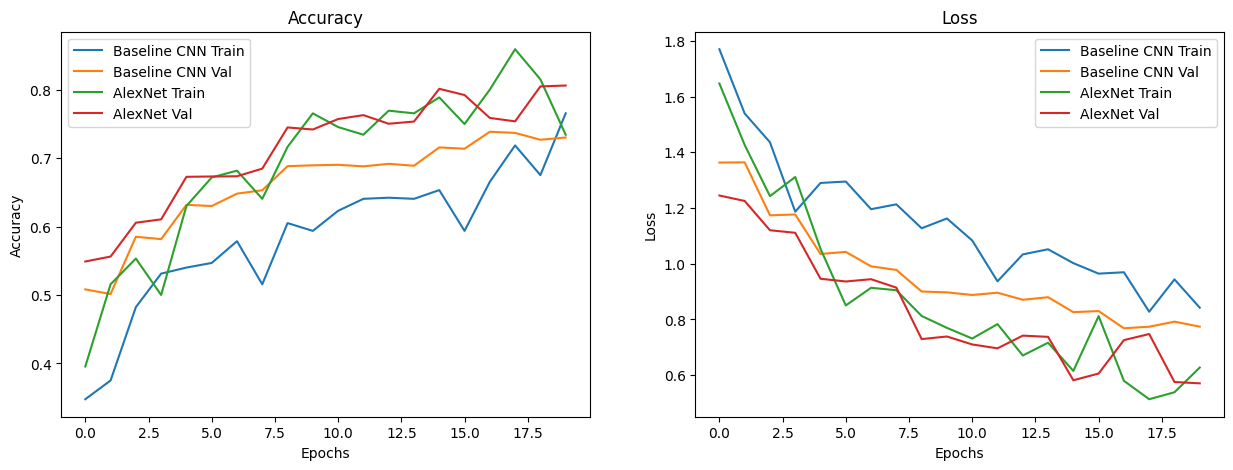

In [10]:

def plot_training_curves(histories, labels):
    plt.figure(figsize=(15,5))

    # Accuracy
    plt.subplot(1,2,1)
    for hist, label in zip(histories, labels):
        plt.plot(hist.history['accuracy'], label=f'{label} Train')
        plt.plot(hist.history['val_accuracy'], label=f'{label} Val')
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    # Loss
    plt.subplot(1,2,2)
    for hist, label in zip(histories, labels):
        plt.plot(hist.history['loss'], label=f'{label} Train')
        plt.plot(hist.history['val_loss'], label=f'{label} Val')
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

plot_training_curves([history_multiclass, history_alexnet_multi],
                     ["Baseline CNN", "AlexNet"])


**Confusion Matrix + Report**

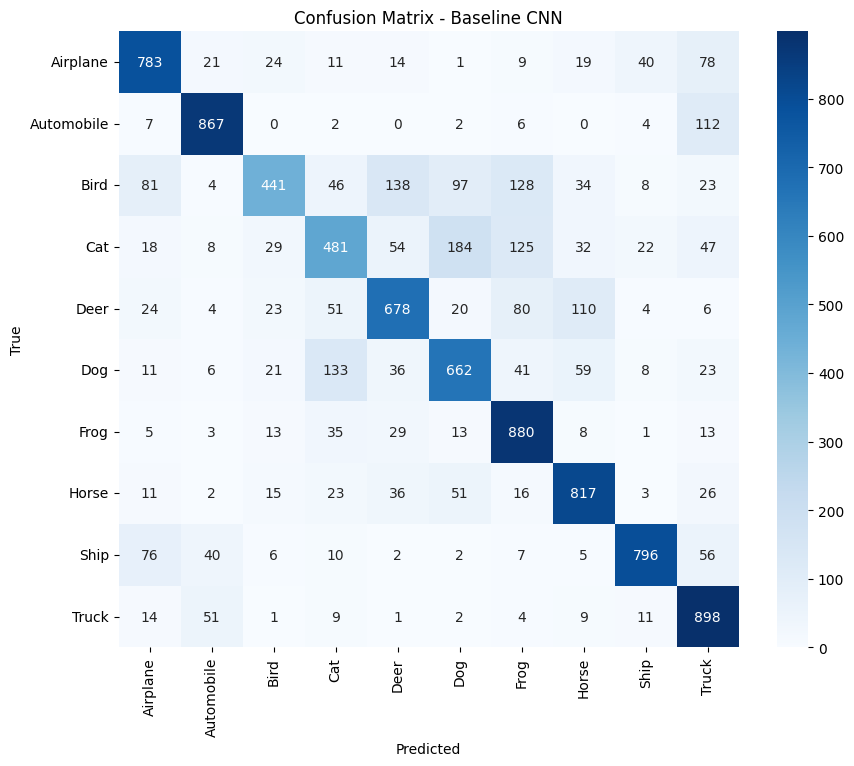

Classification Report - Baseline CNN
              precision    recall  f1-score   support

    Airplane       0.76      0.78      0.77      1000
  Automobile       0.86      0.87      0.86      1000
        Bird       0.77      0.44      0.56      1000
         Cat       0.60      0.48      0.53      1000
        Deer       0.69      0.68      0.68      1000
         Dog       0.64      0.66      0.65      1000
        Frog       0.68      0.88      0.77      1000
       Horse       0.75      0.82      0.78      1000
        Ship       0.89      0.80      0.84      1000
       Truck       0.70      0.90      0.79      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.72     10000
weighted avg       0.73      0.73      0.72     10000



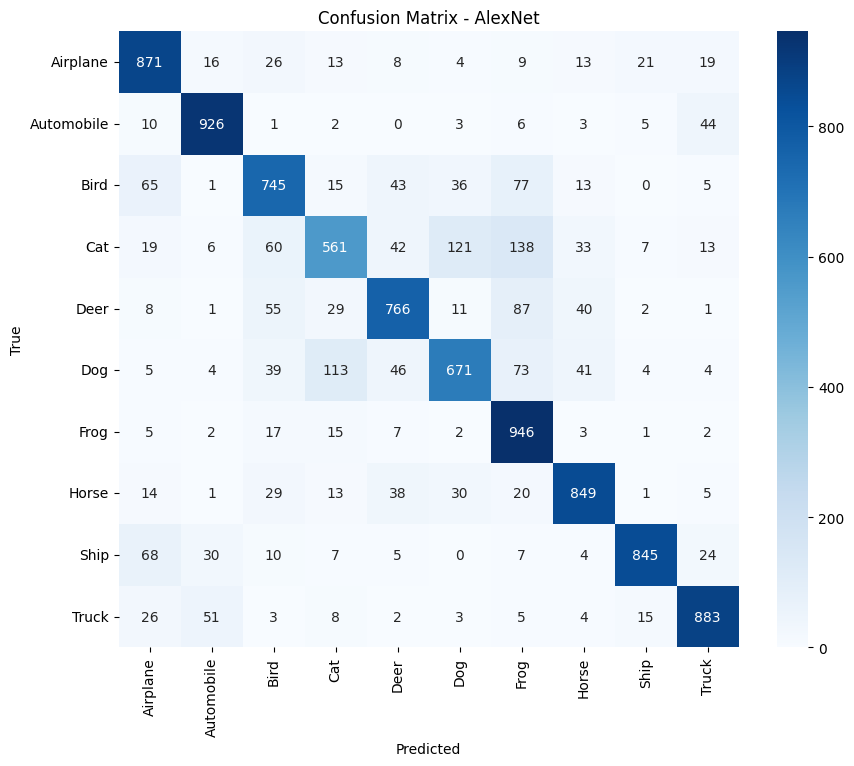

Classification Report - AlexNet
              precision    recall  f1-score   support

    Airplane       0.80      0.87      0.83      1000
  Automobile       0.89      0.93      0.91      1000
        Bird       0.76      0.74      0.75      1000
         Cat       0.72      0.56      0.63      1000
        Deer       0.80      0.77      0.78      1000
         Dog       0.76      0.67      0.71      1000
        Frog       0.69      0.95      0.80      1000
       Horse       0.85      0.85      0.85      1000
        Ship       0.94      0.84      0.89      1000
       Truck       0.88      0.88      0.88      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.80     10000
weighted avg       0.81      0.81      0.80     10000



In [14]:

def evaluate_model_multiclass(model, x_data, y_true, class_names, title="Model"):
    y_pred = np.argmax(model.predict(x_data, verbose=0), axis=1)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix - {title}")
    plt.ylabel("True")
    plt.xlabel("Predicted")
    plt.show()

    # Classification Report
    print(f"Classification Report - {title}")
    print(classification_report(y_true, y_pred, target_names=class_names))

# Baseline CNN
evaluate_model_multiclass(multiclass_model, x_test, y_test, class_names, title="Baseline CNN")

# AlexNet
evaluate_model_multiclass(alexnet_multiclass, x_test, y_test, class_names, title="AlexNet")


**ROC Curves**

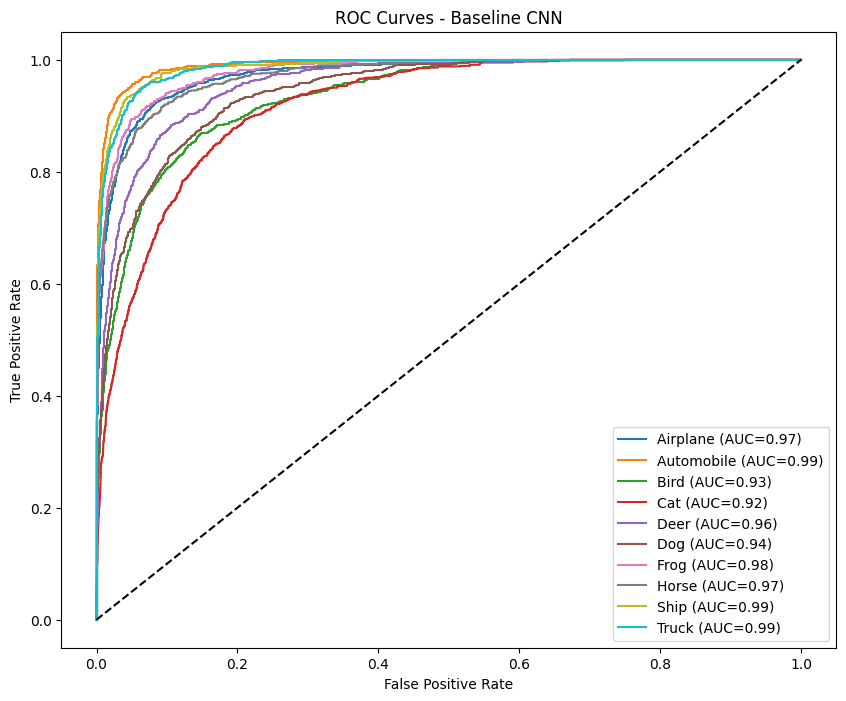

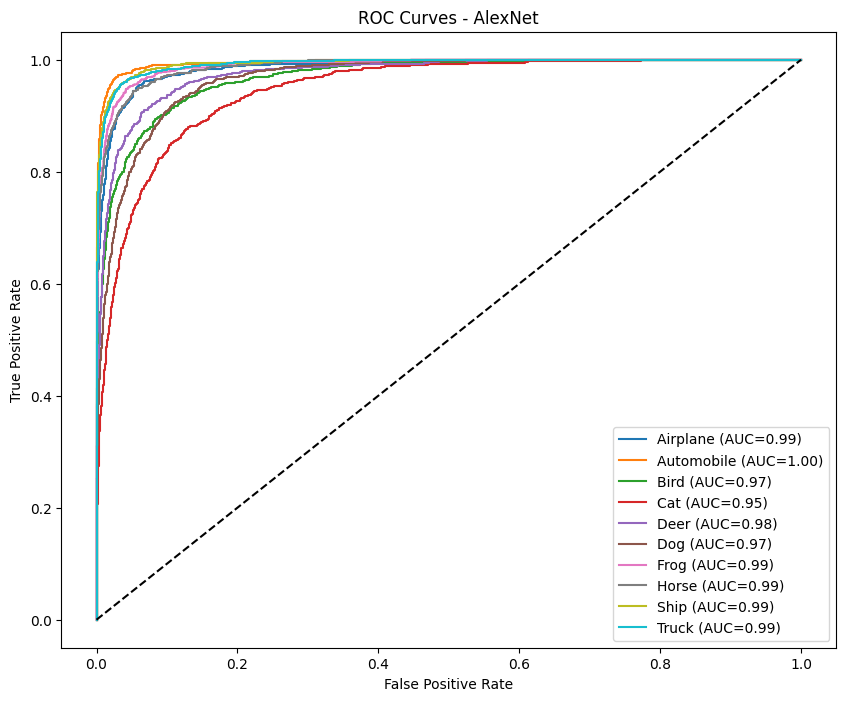

In [12]:

def plot_multiclass_roc(model, x_test, y_test, class_names, title="Model"):
    n_classes = len(class_names)

    # Binarize true labels
    y_test_bin = label_binarize(y_test, classes=range(n_classes))

    # Predictions
    y_score = model.predict(x_test, verbose=0)

    plt.figure(figsize=(10,8))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC={roc_auc:.2f})")

    plt.plot([0,1], [0,1], 'k--')
    plt.title(f"ROC Curves - {title}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

# Baseline CNN
plot_multiclass_roc(multiclass_model, x_test, y_test, class_names, "Baseline CNN")

# AlexNet
plot_multiclass_roc(alexnet_multiclass, x_test, y_test, class_names, "AlexNet")


**Sample Predictions**

Sample Predictions - Baseline CNN


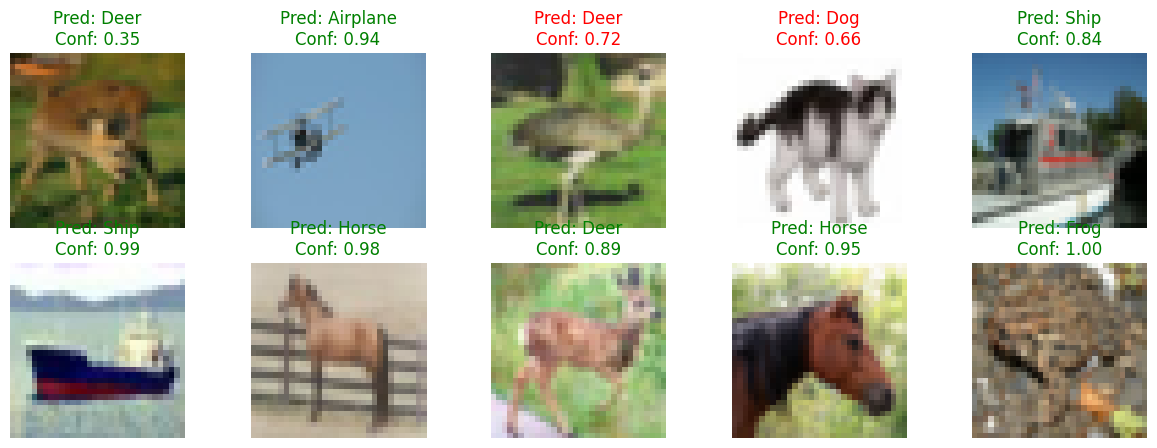

Sample Predictions - AlexNet


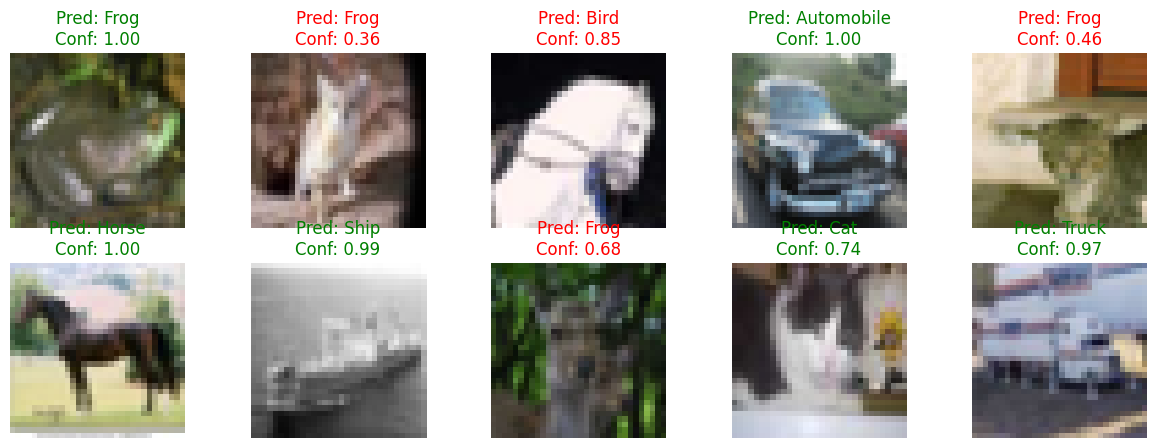

In [15]:

def show_predictions_multiclass(model, x_data, y_data, class_names, n=10):
    plt.figure(figsize=(15,5))
    indices = random.sample(range(len(x_data)), n)

    for i, idx in enumerate(indices):
        img = x_data[idx]
        true_label = y_data[idx]

        # Prediction
        probs = model.predict(np.expand_dims(img, axis=0), verbose=0)[0]
        pred_label = np.argmax(probs)
        confidence = np.max(probs)

        plt.subplot(2, n//2, i+1)
        plt.imshow(img)
        plt.axis("off")

        color = "green" if pred_label == true_label else "red"
        plt.title(f"Pred: {class_names[pred_label]}\nConf: {confidence:.2f}", color=color)

    plt.show()

print("Sample Predictions - Baseline CNN")
show_predictions_multiclass(multiclass_model, x_test, y_test, class_names)

print("Sample Predictions - AlexNet")
show_predictions_multiclass(alexnet_multiclass, x_test, y_test, class_names)
